# Tutorial 4: Visualisation

---

### Introduction

Given the high dimensional data for machine learning methods, visualising them in two-dimensional space is impossible, or at least with our current technology. Visualisation is always useful because it can give us an idea of the distribution between the different classes. But we can try to reduce the high-dimensional features into just two feature components. Multiple techniques can be used to perform feature reduction, but the most used is Principle component analysis (PCA).But in this tuturial we will show how to use the following methods:
- [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [T-distributed Stochastic Neighbor Embedding (tSNE)](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE)

more methods can be found from [here](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)

---

First let us call some packges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
import scipy.stats as st

Next let us recall the data. This tutorial will use the extracted features from the shallow autoencoder model (2nd notebook).

In [14]:
%store -r auto_df_train 
%store -r auto_df_test 
%store -r labels_train
%store -r labels_test
%store -r classes

In [15]:
print(auto_df_train.shape)

(8000, 64)


Drawing 8000 samples from the training data can result in very noisy graphs. Therefore we will need to sample only 1000 from the 8000.

In [16]:
np.random.seed(0)
idx = np.random.choice(auto_df_train.shape[0], 1000)

Now let us try to create a combination between each two features.

In [17]:
print(classes)

['smooth_round', 'smooth_cigar', 'edge_on_disk', 'unbarred_spiral']


In [18]:
from itertools import combinations
comb_class = list(combinations(classes, 2))
print(comb_class)

[('smooth_round', 'smooth_cigar'), ('smooth_round', 'edge_on_disk'), ('smooth_round', 'unbarred_spiral'), ('smooth_cigar', 'edge_on_disk'), ('smooth_cigar', 'unbarred_spiral'), ('edge_on_disk', 'unbarred_spiral')]


---

### Reduce dimensionality with PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca_sample = PCA(n_components=2).fit_transform(np.array(auto_df_train)[idx])
print(pca_sample.shape)

(1000, 2)


The shape of the reduced PCA sample is now 8000 x 2 from 8000 x 64, now we can plot the reduced samples in a 2D graph

In [9]:
from source.ellipse import draw_confidence_ellipse


We will represent the data using a scatterplot, and will superimpose confidence ellipses to bring out the general orientation and extent of the data. A confidence ellipse shows where the data is most heavily concentrated (i.e. where the probability density is highest). Confidence regions are used for predicting new observations with a certain degree of confidence, which depends on the confidence parameter (measured in standard deviations) used to generate the ellipse.

The syntax for the `draw_Confidence_ellipse` command is as follows:

 draw_Confidence_ellipse (data1_x, data1_y, data2_x, data2_y, "y-axis label", "x-axis label", "title", x-scale, y-scale)"


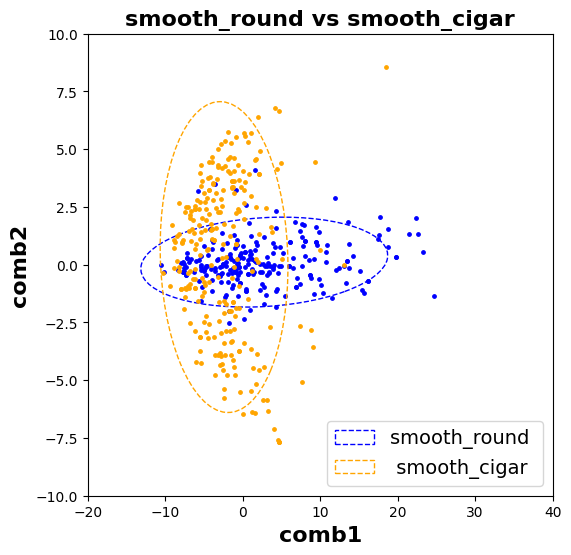

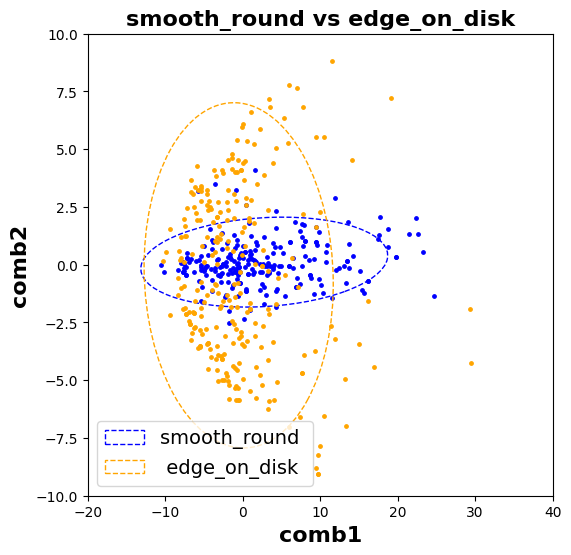

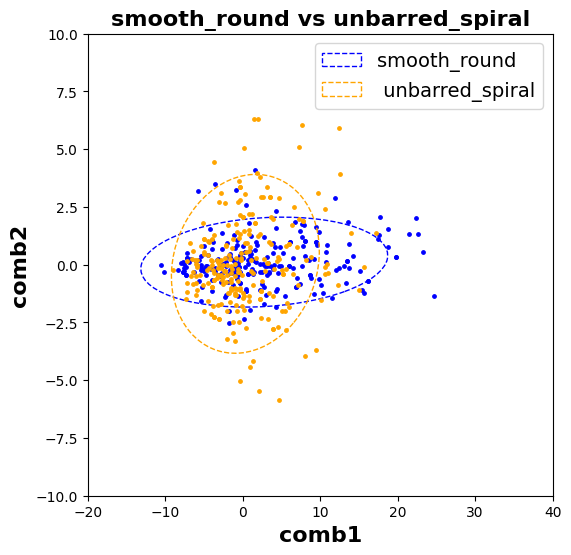

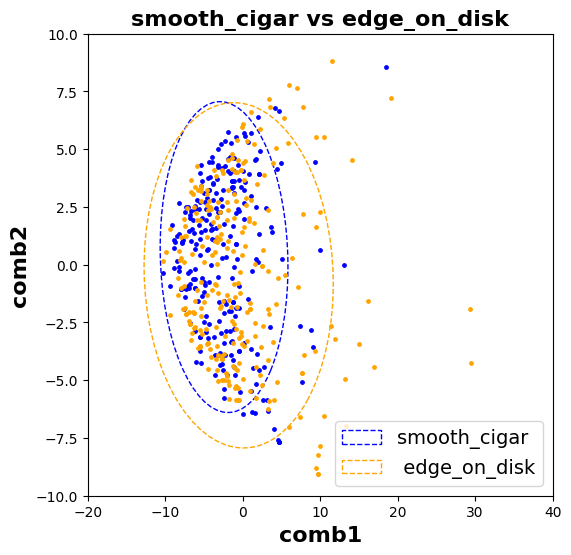

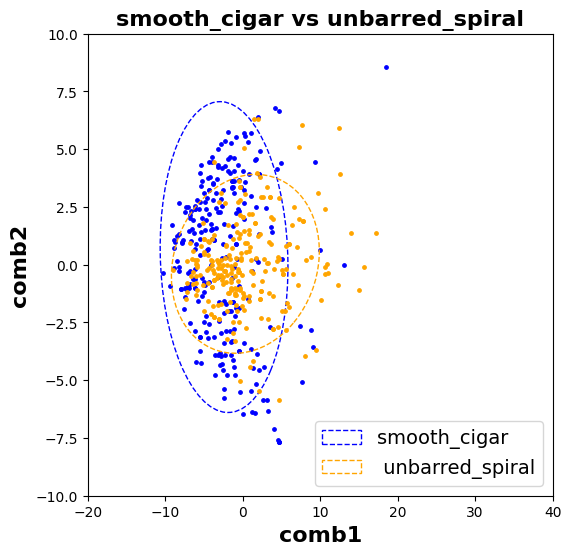

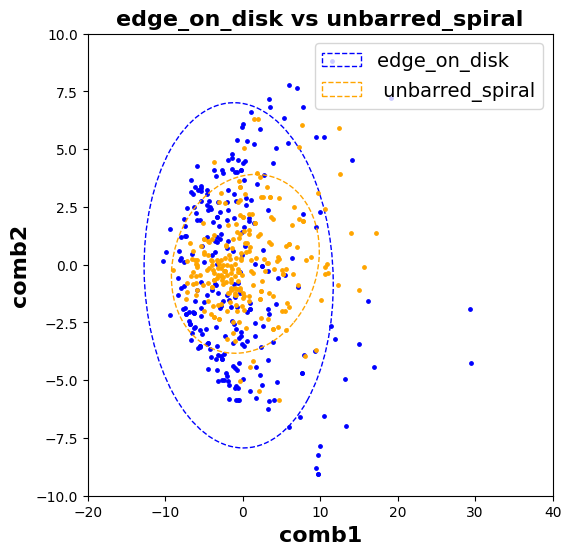

In [10]:
for cc in comb_class:
    class_i = (np.array(labels_train) == classes.index(cc[0]) )[idx] # getting 1000 random samples from the 1st class
    class_j = (np.array(labels_train) == classes.index(cc[1]) )[idx] # getting 1000 random samples from the 2nd class
    draw_confidence_ellipse (pca_sample[:, 0][class_i], pca_sample[:, 1][class_i], pca_sample[:, 0][class_j], pca_sample[:, 1][class_j], "comb1", "comb2", cc[0]+" vs "+cc[1], (-20,40), (-10,10))

### Reduce dimensionality with TSNE

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne_sample = TSNE(n_components=2, init='pca', perplexity=10, learning_rate = 10).fit_transform(np.array(auto_df_train)[idx])

/users/hussein/work/galaxy-cluster/v_gal/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


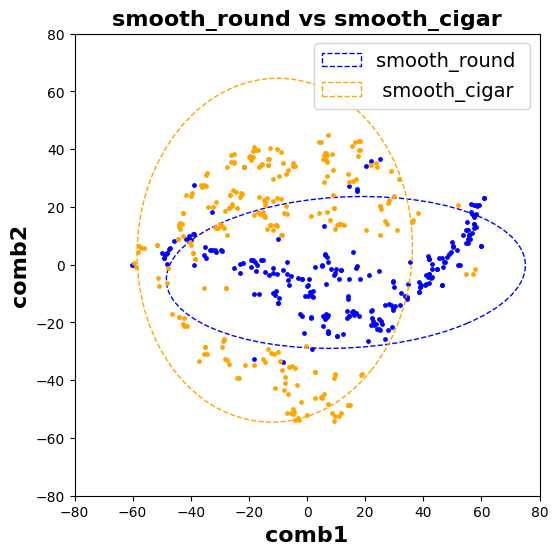

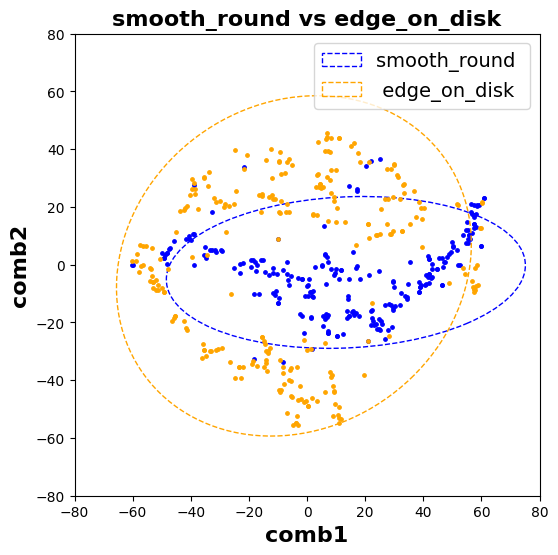

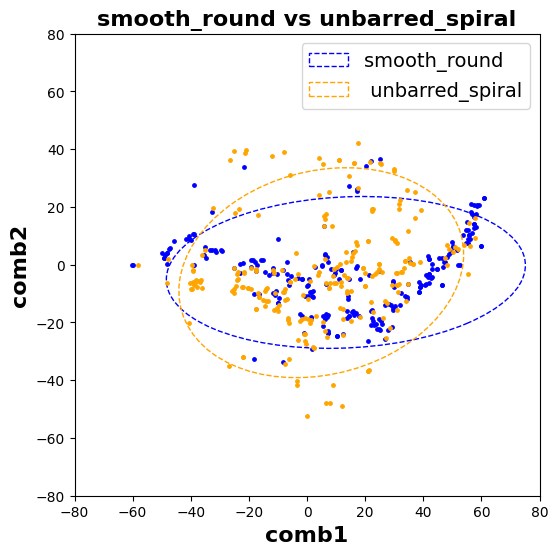

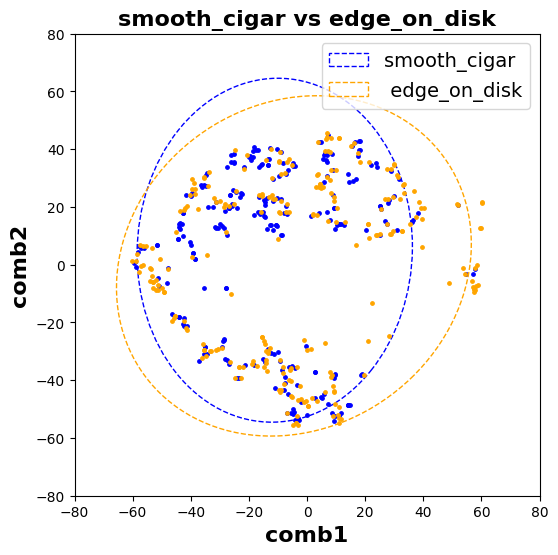

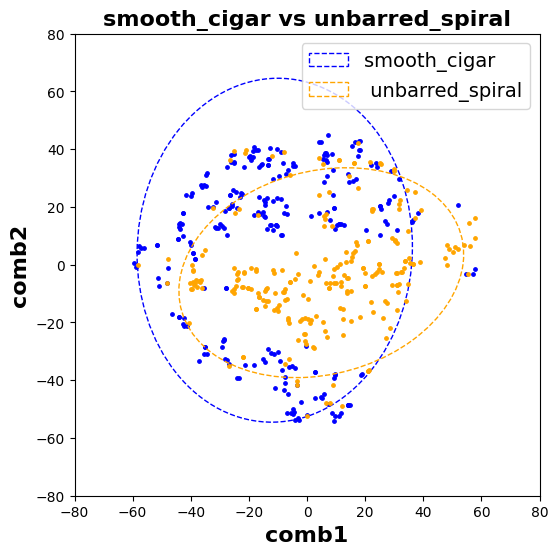

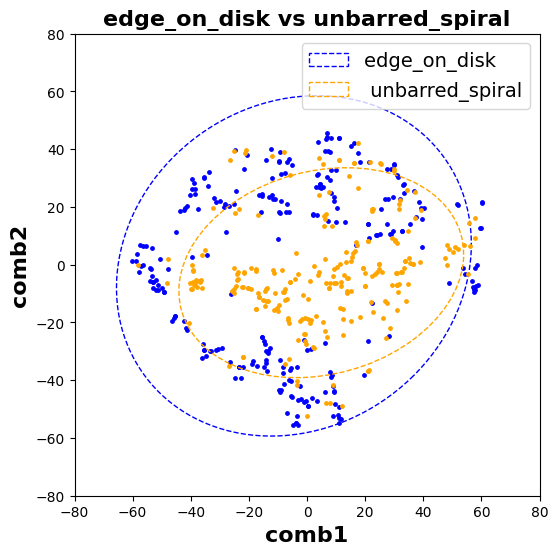

In [13]:
for cc in comb_class:
    class_i = (np.array(labels_train) == classes.index(cc[0]) )[idx] # we can restrict the number of samples from here
    class_j = (np.array(labels_train) == classes.index(cc[1]) )[idx]
    draw_confidence_ellipse (tsne_sample[:, 0][class_i], tsne_sample[:, 1][class_i], tsne_sample[:, 0][class_j], tsne_sample[:, 1][class_j], "comb1", "comb2", cc[0]+" vs "+cc[1], (-80,80), (-80,80))

The graph from both tools shows that it will be tough to distinguish between the `smooth cigar` and `edge_on_desk`. Also, the TSNE method does much better in determining the two classes than the PCA.

---

**Exercise :** from the List we showed [here](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)
choose one more methods and show the distibution between the two classes

---

### Save the data

In [21]:
%store auto_df_train 
%store auto_df_test
%store pca_sample

Stored 'auto_df_train' (DataFrame)
Stored 'auto_df_test' (DataFrame)
Stored 'pca_sample' (ndarray)


---

Note, this tutorial is inspired by this work [here](https://spacetelescope.github.io/hellouniverse/notebooks/hello-universe/Classifying_PanSTARRS_sources_with_unsupervised_learning/Classifying_PanSTARRS_sources_with_unsupervised_learning.html)